In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pdb import set_trace

from google.colab import drive
drive.mount("/drive")

sys.path.insert(0,"/drive/MyDrive/FHNW/galaxy_generator/galaxy-generator/python_modules/")

from dataset import get_labels_train, get_x_train
from file_system import file_galaxy_labels


Mounted at /drive

!!!!!!!!!!

galaxyzoo_data_cropped_nonnormalized.npy and training_solutions_rev1.csv must be placed in google drive under FHNW/galaxy_generator/
the results will be placed there, too.



In [ ]:
images = get_x_train()

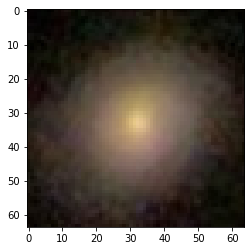

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
0    100008  0.383147  0.616853  ...        0.0        0.0   0.325512

[1 rows x 38 columns]


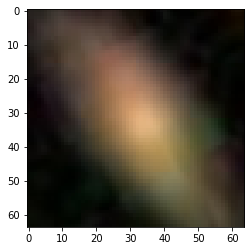

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
1    100023  0.327001  0.663777  ...        0.0        0.0        0.0

[1 rows x 38 columns]


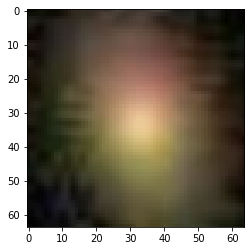

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
2    100053  0.765717  0.177352  ...        0.0        0.0        0.0

[1 rows x 38 columns]


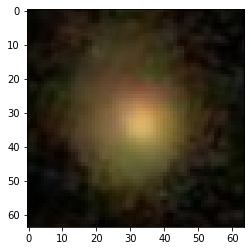

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
3    100078  0.693377  0.238564  ...        0.0        0.0        0.0

[1 rows x 38 columns]


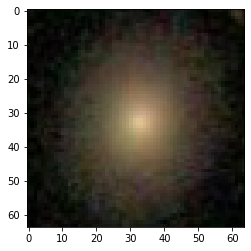

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
4    100090  0.933839       0.0  ...        0.0        0.0        0.0

[1 rows x 38 columns]


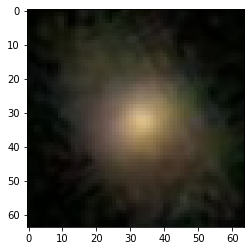

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
5    100122  0.738832  0.238159  ...        0.0        0.0        0.0

[1 rows x 38 columns]


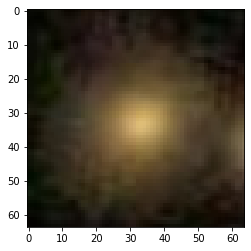

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
6    100123  0.462492  0.456033  ...        0.0        0.0        0.0

[1 rows x 38 columns]


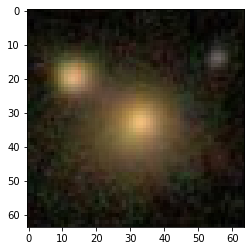

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
7    100128  0.687783  0.288344  ...        0.0        0.0        0.0

[1 rows x 38 columns]


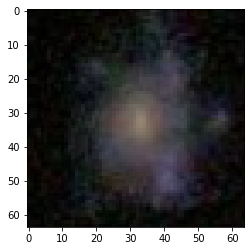

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
8    100134  0.021834  0.976952  ...   0.081974   0.081974   0.327894

[1 rows x 38 columns]


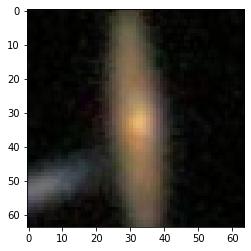

   GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
9    100143  0.269843  0.730157  ...        0.0        0.0        0.0

[1 rows x 38 columns]


In [ ]:
ix = np.random.randint(labels.shape[0])
for ix in range(10):
    plt.imshow(np.transpose(images[ix], (1,2,0)))
    plt.show()
    print(df_galaxy_labels[ix:ix+1])

# prepare data

In [2]:
df_galaxy_labels =  read_csv(file_galaxy_labels)
labels = df_galaxy_labels[df_galaxy_labels.columns].values
print(labels.shape)
df_galaxy_labels.head() 

(61578, 38)


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027226,0.000000,0.027226,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
classes = list(df_galaxy_labels)

In [3]:
label_info = { # (name, next group), 0 == end
    ## 1: smooth, disk or artifact/star
    1 : ("smooth",7),
    2 : ("disk",2),
    3 : ("artifact",0),

    ## 2: edge on
    4 : ("edge-on disk",9),
    5 : ("not edge-on",3),

    ## 3: barred
    6 : ("barred",4),
    7 : ("not barred",4),

    ## 4: spiral arms
    8 : ("spiral arms",10),
    9 : ("no spiral arms",5),

    ## 5: bulge
    10 : ("no bulge",6),
    11 : ("noticable bulge",6),
    12 : ("obvios bulge",6),
    13 : ("domintat bulge",6),

    ## 6: anything odd
    14 : ("odd",8),
    15 : ("not odd",0),

    ## 7: roundness
    16 : ("completely round",6),
    17 : ("ellptic",6),
    18 : ("cigar-shaped",6),

    ## 8: odd features
    19 : ("ring",0),
    20 : ("lens",0),
    21 : ("disturbed",0),
    22 : ("irregular",0),
    23 : ("other",0),
    24 : ("merger",0),
    25 : ("dust lane",0),

    ## 9: bulge shape
    26 : ("rounded",6),
    27 : ("boxy",6),
    28 : ("no bulge",6),

    ## 10: tightness of spiral arms
    29 : ("tight",11),
    30 : ("medium",11),
    31 : ("loose",11),

    ## 11: number of spiral arms
    32 : ("one",5),
    33 : ("two",5),
    34 : ("three",5),
    35 : ("four",5),
    36 : ("five+",5),
    37 : ("can't tell",5),
}

class_groups = {
    0 : (),
    1 : (1,2,3),
    2 : (4,5),
    3 : (6,7),
    4 : (8,9),
    5 : (10,11,12,13),
    6 : (14,15),
    7 : (16,17,18),
    8 : (19,20,21,22,23,24,25),
    9 : (26,27,28),
    10 : (29,30,31),
    11 : (32,33,34,35,36,37),
}

class_groups_indices = {g:np.array(ixs) for g, ixs in class_groups.items()}

In [4]:
labels_renorm = labels.copy()
for group, idx in class_groups.items():
    if not idx:
        continue
    idx = np.array(idx)
    norm = np.sum(labels_renorm[:,idx], axis=1, keepdims=True)
    norm[norm==0] = 1
    labels_renorm[:,idx] /= norm


In [ ]:


def get_class_likelihood(group, label_old, P_old, item):
    if not group:
        return [label_old], [P_old]
    labels = []
    Ps = []
    for i in class_groups[group]:
        label, next_group = label_info[i]
        P = item[i]
        label = ", ".join([label_old, label]) if label_old else label
        P = P_old * P
        label, P = get_class_likelihood(next_group, label, P, item)
        labels.extend(label)
        Ps.extend(P)
    return labels, Ps


# test
get_class_likelihood(6, "", 1., labels[0])

def get_likelihood():
    Ps = 1.
    for item in labels_renorm:
        class_labels, class_P = get_class_likelihood(1, "", 1., item)
        Ps = Ps + np.array(class_P)
    return class_labels, Ps


In [ ]:
class_labels, class_P = get_class_likelihood(1, "", 1., labels[0])
len(class_labels), len(class_P), sum(class_P)

(1265, 1265, 0.17655584098201282)

# investigate labels and generate new ones

In [ ]:
from torch import cat, rand, sum, range
from torch.nn import Softmax


label_group_sizes = [3,2,2,2,4,2,3,7,3,3,6]
labels_dim = np.sum(label_group_sizes)

def generate_galaxy_labels(batch_size):
    """ generate a batch of hierarchical galaxy labels """
    norm = Softmax(dim=1)
    groups = [norm(rand(batch_size, l)) for l in label_group_sizes]
    groups = make_galaxy_labels_hierarchical(groups)
    return groups.detach()




def make_galaxy_labels_hierarchical(groups):
    """ transform groups of galaxy label probabilities to follow the hierarchical order defined in galaxy zoo
    more info here: https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/overview/the-galaxy-zoo-decision-tree
    groups is a list of Nxl torch tensors, where N is the batch size 
    and l is the number of labels in each group, listed in label_group_sizes
    in each group probabilities should add to one

    Return
    ------
    hierarchical_labels : NxL torch tensor, where L is the total number of labels
    """
    ## first [0] group has norm unity
    groups[1] = groups[1] * groups[0][:,1].unsqueeze(-1) ## edge on
    groups[2] = groups[2] * groups[1][:,1].unsqueeze(-1) ## sign of a bar
    groups[3] = groups[3] * groups[1][:,1].unsqueeze(-1) ## sign of spirals
    groups[4] = groups[4] * groups[1][:,1].unsqueeze(-1) ## bulge prominence
#    groups[5] = groups[5] * sum(groups[0][:,:2], dim=1).unsqueeze(-1) ## anything odd
    groups[6] = groups[6] * groups[0][:,0].unsqueeze(-1) ## how round
    groups[7] = groups[7] * groups[5][:,0].unsqueeze(-1) ## odd features
    groups[8] = groups[8] * groups[1][:,0].unsqueeze(-1) ## bulge shape
    groups[9] = groups[9] * groups[3][:,0].unsqueeze(-1) ## tightly wound arms
    groups[10] = groups[10] * groups[3][:,0].unsqueeze(-1) ## how many arms
    hierarchical_labels = cat(groups, dim=1)
    return hierarchical_labels


def dot_flat(a, b):
    """ multiply each element in a to each element in b, return results in flat array """
    result = a[...,None] @ b[None,...]
    return result.flatten()


def label_leaves_likelihood(labels):
    """ compute likelihood for all leaves in the hierarchical label tree """
    move = len(labels) == 37
    def P_group(g):
        return labels[class_groups_indices[g]-move]
    P3 = P_group(3).sum()
    P5 = P_group(5).sum()
    P6 = P_group(6).sum()
#    P6 = P_group(1)[:2].sum()   
    P11 = P_group(11).sum()
    print(P6, P3, P5, P11)
    P3 = P3 if P3 else 1.
    P5 = P5 if P5 else 1.
    P6 = P6 if P6 else 1.
    P11 = P11 if P11 else 1.
    ## artifact                 1
    leaves = [P_group(1)[2]]
    ## round regular            3
    l = P_group(7) * P_group(6)[1] / P6
    leaves += list(l)
    ## round odd                21
    l = dot_flat(P_group(7), P_group(8)) / P6
    leaves += list(l)
    ## disk edge regular        3
    l = P_group(9) * P_group(6)[1] / P6
    leaves += list(l)
    ## disk edge odd            21
    l = dot_flat(P_group(9), P_group(8)) / P6
    leaves += list(l)
    ## disk arms regular        144
    l = dot_flat(dot_flat(dot_flat(P_group(3), P_group(10)), P_group(11)), P_group(5)) * P_group(6)[1] / P3 / P11 / P5 / P6 
    leaves += list(l)
    ## disk arms odd            1008
    l = dot_flat(dot_flat(dot_flat(dot_flat(P_group(3), P_group(10)), P_group(11)), P_group(5)), P_group(8)) / P3 / P11 / P5 / P6 
    leaves += list(l)
    ## disk no arms regular     8
    l = dot_flat(P_group(3), P_group(5)) * P_group(4)[1] * P_group(6)[1] / P3 / P5 / P6
    leaves += list(l)
    ## disk no arms odd         65
    l = dot_flat(dot_flat(P_group(3), P_group(5)), P_group(8)) * P_group(4)[1] / P3 / P5 / P6
    leaves += list(l)
    ## total                    1265
    return np.array(leaves)

In [ ]:
label_renorm = labels_renorm[1]
[label_renorm[class_groups_indices[k]][None,...] for k in class_groups_indices.keys() if k > 0]

[array([[0.327001, 0.663777, 0.009222]]),
 array([[0.046971, 0.953029]]),
 array([[0.738809, 0.261191]]),
 array([[0.93476, 0.06524]]),
 array([[0.      , 0.374299, 0.254412, 0.371289]]),
 array([[0.189149, 0.810851]]),
 array([[0.      , 0.413093, 0.586907]]),
 array([[0.      , 0.      , 0.742026, 0.      , 0.257974, 0.      ,
         0.      ]]),
 array([[0.398166, 0.      , 0.601834]]),
 array([[0.      , 0.222174, 0.777826]]),
 array([[0., 1., 0., 0., 0., 0.]])]

In [ ]:
from torch import range
ixs = tensor([1,2,5])
a = range(0,9)[None,...]
a[:,ixs]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([[1., 2., 5.]])

In [ ]:
from torch import tensor
for label_renorm, label in zip(labels_renorm, labels[:10]):
    label_renorm = [tensor(label_renorm[class_groups_indices[k]][None,...]) for k in class_groups_indices.keys() if k > 0]
    label_ = make_galaxy_labels_hierarchical(label_renorm)
    label = tensor(label[1:])[None,...]
    print(label_- label)
    print(sum((label_ - label)**2))

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -6.9389e-18, -1.1102e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -1.3878e-17, -1.1102e-16,  0.0000e+00,  6.9389e-18,  1.1102e-16,
         -5.5511e-17, -2.7756e-17,  0.0000e+00,  0.0000e+00,  3.4694e-18,
          0.0000e+00,  3.4694e-18,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -5.5511e-17, -2.7756e-17,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], dtype=torch.float64)
tensor(4.4995e-32, dtype=torch.float64)
tensor([[-5.5511e-17, -1.1102e-16, -1.7347e-18,  3.4694e-18,  0.0000e+00,
         -5.5511e-17, -2.7756e-17,  9.3476e-10,  6.5240e-11,  0.0000e+00,
          3.7430e-10,  2.5441e-10,  3.7129e-10,  0.0000e+00,  0.0000e+00,
          0.0000e+00, -2.7756e-17, -2.7756e-17,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -3.98

In [ ]:
labels_original = labels[3]
labels_original = labels_fake[0]
print(labels_original)
for group, ixs in class_groups_indices.items():
    if len(ixs):
        print(f"{group}: {labels_original[ixs].sum():.4}, \t {labels_original[ixs]}")


tensor([1.0000, 0.3961, 0.3099, 0.2941, 0.1938, 0.1160, 0.0623, 0.0537, 0.0571,
        0.0589, 0.0270, 0.0254, 0.0240, 0.0396, 0.6193, 0.3807, 0.1554, 0.1387,
        0.1020, 0.1166, 0.0555, 0.1121, 0.1064, 0.0494, 0.0584, 0.1208, 0.0329,
        0.0337, 0.0495, 0.0131, 0.0131, 0.0309, 0.0107, 0.0112, 0.0071, 0.0105,
        0.0071, 0.0105])
1: 1.0, 	 tensor([0.3961, 0.3099, 0.2941])
2: 0.3099, 	 tensor([0.1938, 0.1160])
3: 0.116, 	 tensor([0.0623, 0.0537])
4: 0.116, 	 tensor([0.0571, 0.0589])
5: 0.116, 	 tensor([0.0270, 0.0254, 0.0240, 0.0396])
6: 1.0, 	 tensor([0.6193, 0.3807])
7: 0.3961, 	 tensor([0.1554, 0.1387, 0.1020])
8: 0.6193, 	 tensor([0.1166, 0.0555, 0.1121, 0.1064, 0.0494, 0.0584, 0.1208])
9: 0.116, 	 tensor([0.0329, 0.0337, 0.0495])
10: 0.05714, 	 tensor([0.0131, 0.0131, 0.0309])
11: 0.05714, 	 tensor([0.0107, 0.0112, 0.0071, 0.0105, 0.0071, 0.0105])


In [ ]:
for labels_original in labels[20:40]:
    print(label_leaves_likelihood(labels_original).sum())

0.9999997649999999
1.0
0.9999998990000002
1.0000000009999999
1.0000000009999999
1.0
0.99999992200976
0.9999999201540002
1.000000069697125
0.9999997435260011
1.0
1.0000003759999998
1.0
0.9999990009999998
1.0
1.000000001
1.000001
1.000000000990146
1.0000000000000002
1.0000010000000001


In [ ]:
labels_fake = generate_galaxy_labels(1)
from torch import tensor
labels_fake = tensor([[0.3860, 0.1900, 0.4240, 0.0781, 0.1119, 0.0434, 0.0685, 0.0418, 0.0701,
        0.0311, 0.0251, 0.0241, 0.0316, 0.4983, 0.5017, 0.1429, 0.1222, 0.1209,
        0.0851, 0.0508, 0.1122, 0.0658, 0.0800, 0.0497, 0.0546, 0.0205, 0.0263,
        0.0313, 0.0158, 0.0104, 0.0155, 0.0064, 0.0074, 0.0059, 0.0077, 0.0060,
        0.0086]])
leaves_fake = label_leaves_likelihood(labels_fake[0])
print(leaves_fake.sum())
ids = range(1,labels_fake.shape[0])
labels_fake = cat((ids[None,...], labels_fake), dim=1)
print(ids.shape)

leaves_fake = label_leaves_likelihood(labels_fake[0])
print(leaves_fake.sum())

tensor(1.) tensor(0.1119) tensor(0.1119) tensor(0.0420)
0.9998425
torch.Size([1])
tensor(1.) tensor(0.1119) tensor(0.1119) tensor(0.0420)
0.9998425


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
g = 11
def P_group(g, labels):
    return labels[class_groups_indices[g]-1]
print(P_group(g, labels_fake[0]))
def P_group(g, labels):
    return labels[class_groups_indices[g]]
labels = cat((tensor([[1]]),labels_fake), dim=1)[0]
print(P_group(g, labels))


tensor([0.0064, 0.0074, 0.0059, 0.0077, 0.0060, 0.0086])
tensor([0.0064, 0.0074, 0.0059, 0.0077, 0.0060, 0.0086])


# check data imbalance

In [ ]:
class_labels, class_P = get_likelihood()
class_P.shape

(1265,)

In [ ]:
sum(class_P)

62842.999999999985

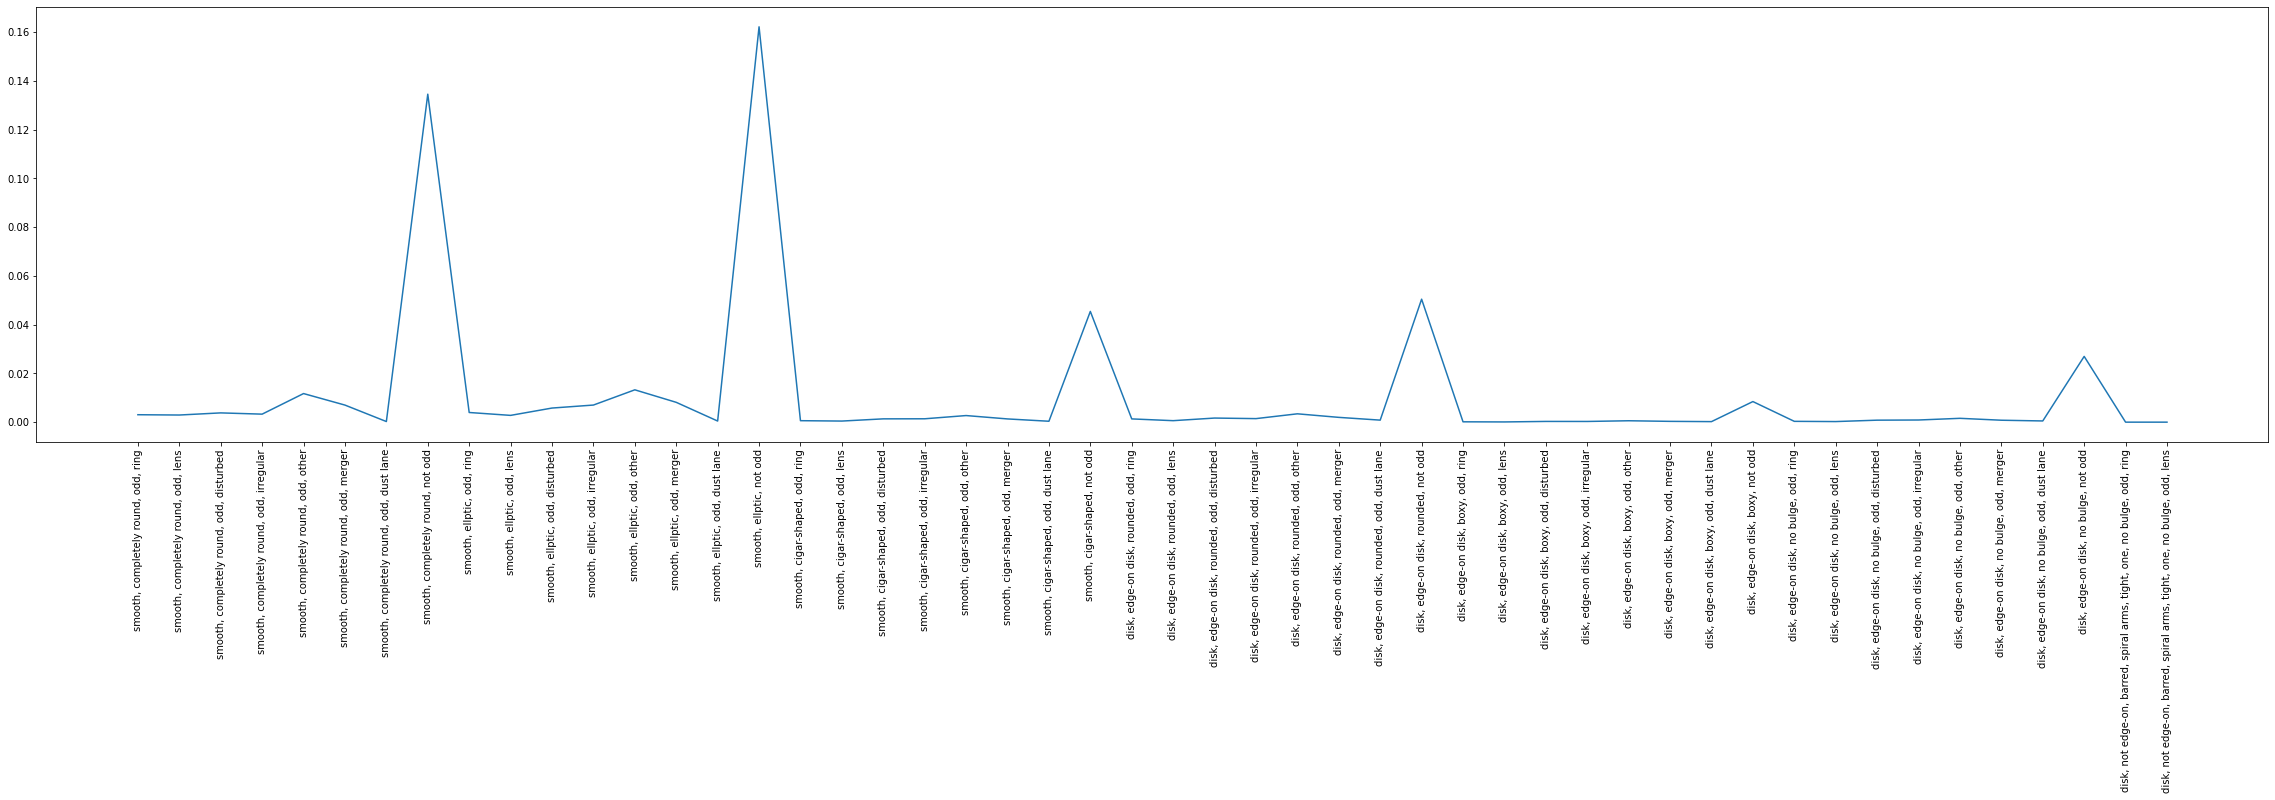

In [ ]:
plt.figure(figsize=(40,8))
plt.plot(class_labels[:50],class_P[:50]/sum(class_P))
#plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Dataset is very imbalanced.

dominant classes:

In [ ]:
idx = np.argsort(class_P)
idx = reversed(idx)
class_P_renorm = class_P / sum(class_P)
for ix in idx:
    print(f"{class_labels[ix]}: {class_P_renorm[ix]:.3}")
    if class_P_renorm[ix] < 1e-2:
        break

smooth, ellpitic, not odd: 0.162
smooth, completely round, not odd: 0.135
disk, not edge-on, not barred, no spiral arms, obvios bulge, not odd: 0.0556
disk, edge-on disk, rounded, not odd: 0.0505
disk, not edge-on, not barred, no spiral arms, noticable bulge, not odd: 0.0475
smooth, cigar-shaped, not odd: 0.0454
disk, edge-on disk, no bulge, not odd: 0.027
artifact: 0.0247
smooth, ellpitic, odd, other: 0.0133
disk, not edge-on, barred, no spiral arms, obvios bulge, not odd: 0.0124
smooth, completely round, odd, other: 0.0117
disk, not edge-on, not barred, spiral arms, tight, can't tell, noticable bulge, not odd: 0.0117
disk, not edge-on, not barred, no spiral arms, domintat bulge, not odd: 0.0116
disk, not edge-on, not barred, no spiral arms, no bulge, not odd: 0.0113
disk, not edge-on, barred, no spiral arms, noticable bulge, not odd: 0.0103
disk, not edge-on, not barred, spiral arms, tight, can't tell, obvios bulge, not odd: 0.00881


# imbalance in each group

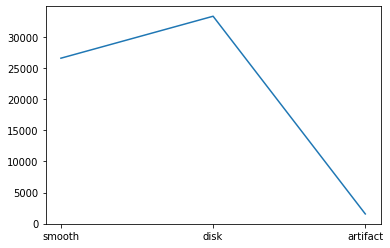

total group 1: 61577.999937


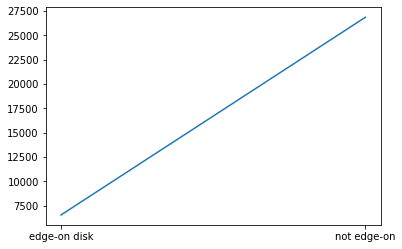

total group 2: 33391.365339088


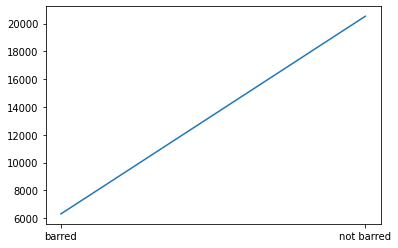

total group 3: 26838.990020463996


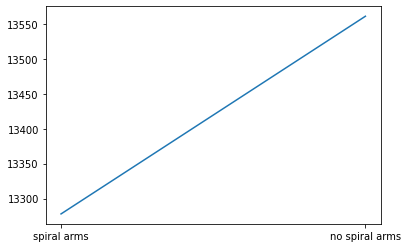

total group 4: 26838.990021018


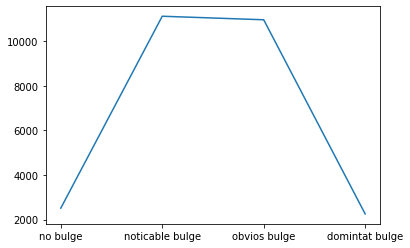

total group 5: 26838.989938839997


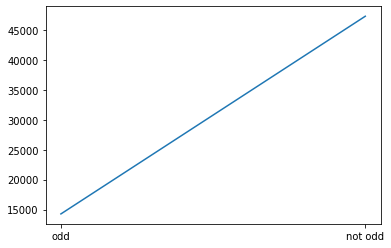

total group 6: 61578.00000000001


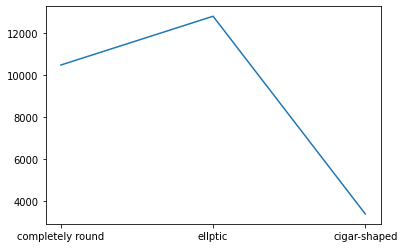

total group 7: 26634.078906520004


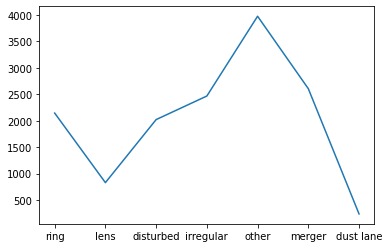

total group 8: 14274.235173864


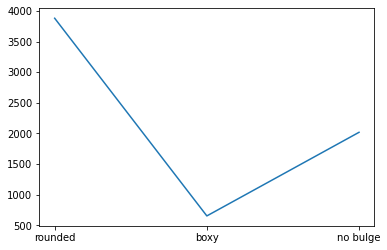

total group 9: 6552.375270758


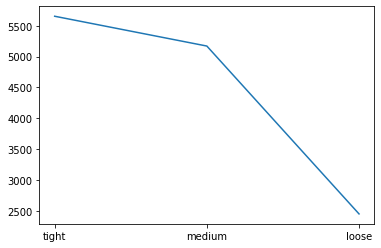

total group 10: 13278.007971990999


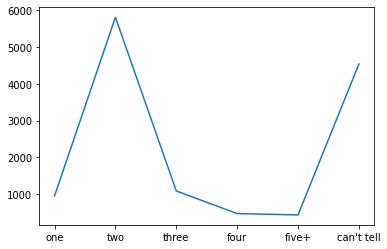

total group 11: 13278.007726579


In [ ]:
for group, idx in class_groups.items():
    if not group:
        continue
    P = np.sum(np.array(labels)[:,np.array(idx)], axis=0) 
    labels_ = []
    for ix in idx:
        label, _ = label_info[ix]
        labels_.append(label)
    plt.plot(labels_, P)
    plt.show()
    print(f"total group {group}: {sum(P)}")


# fraction of certain and uncertain labels

group 0
group 1


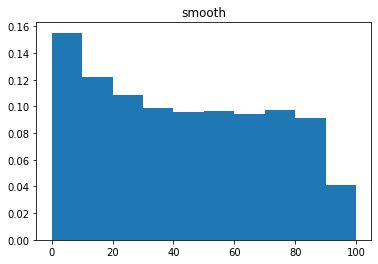

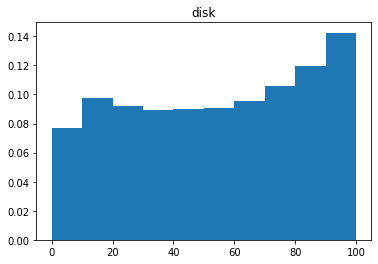

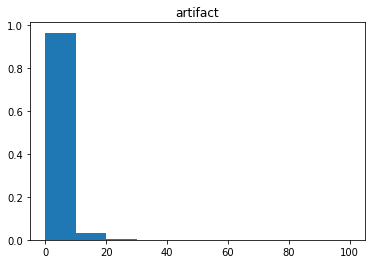

group 2


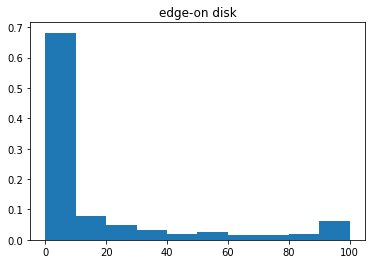

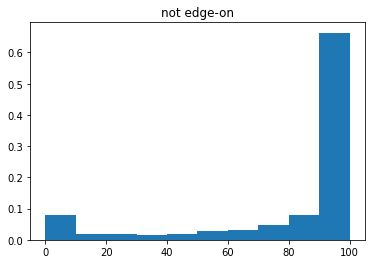

group 3


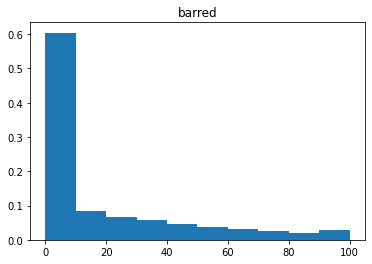

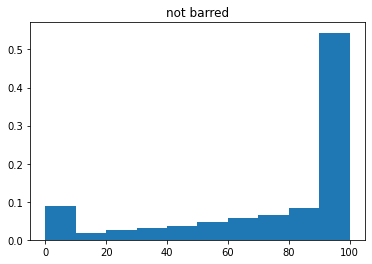

group 4


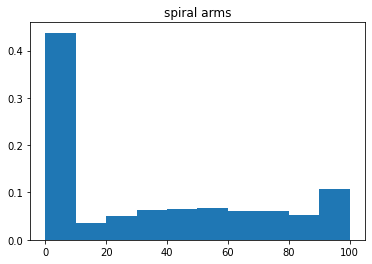

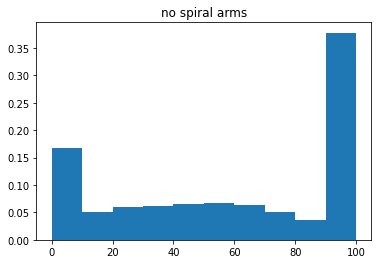

group 5


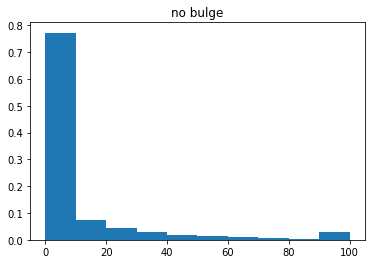

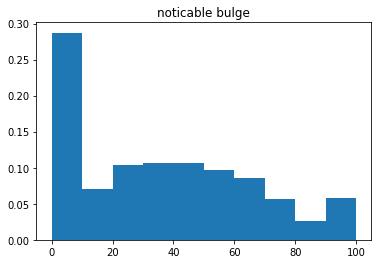

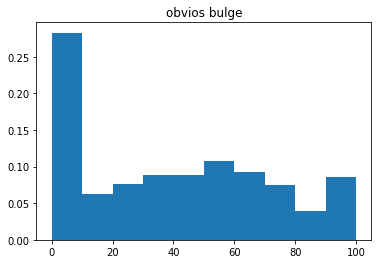

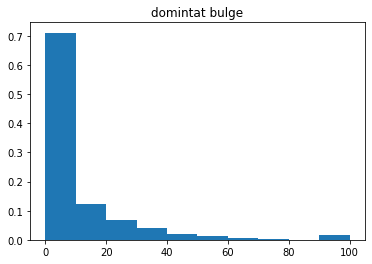

group 6


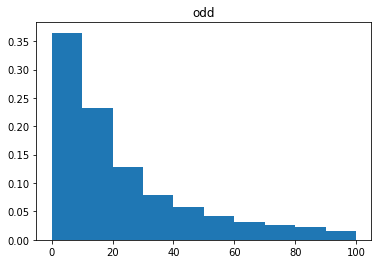

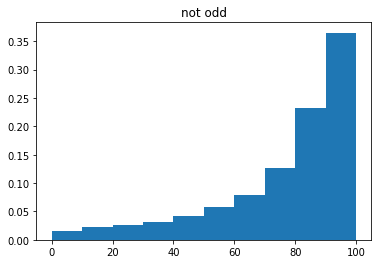

group 7


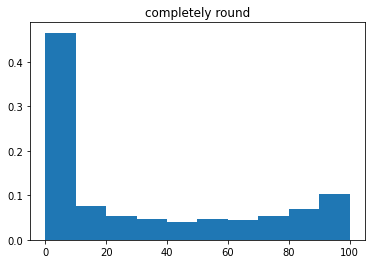

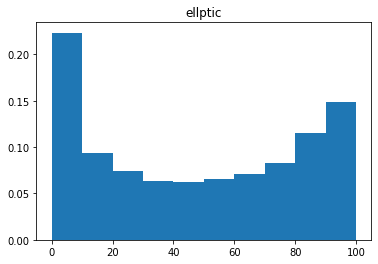

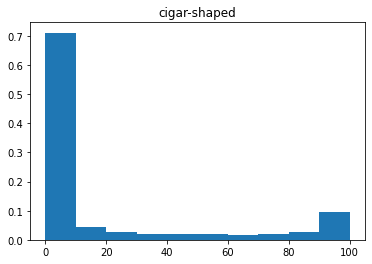

group 8


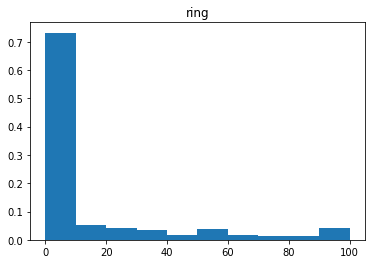

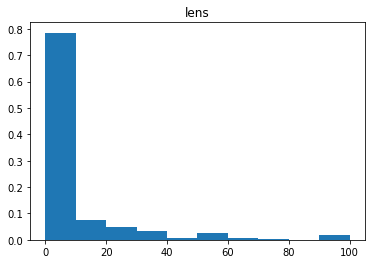

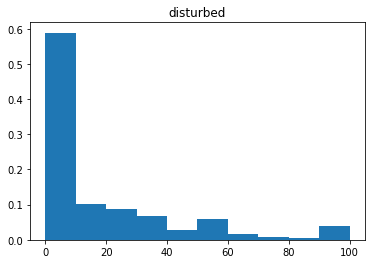

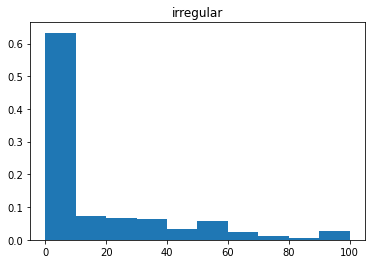

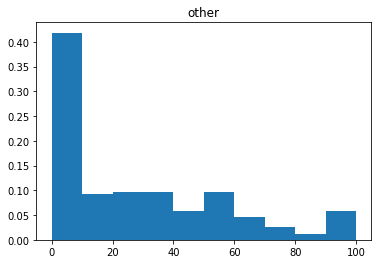

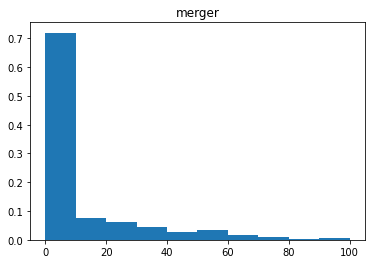

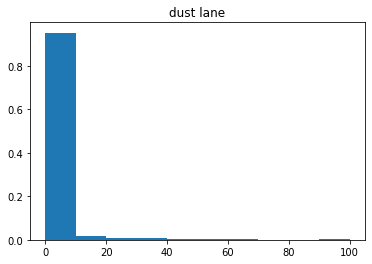

group 9


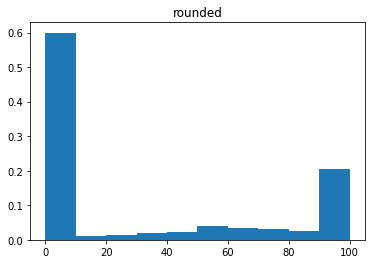

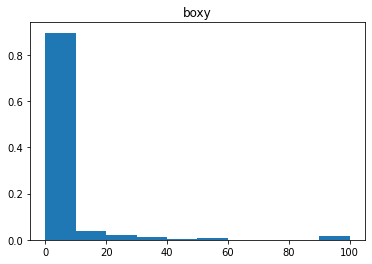

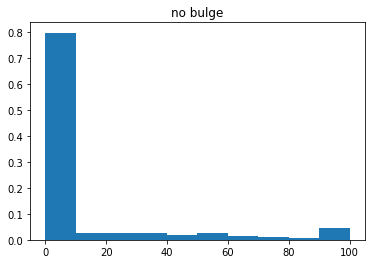

group 10


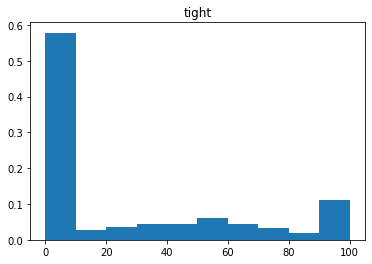

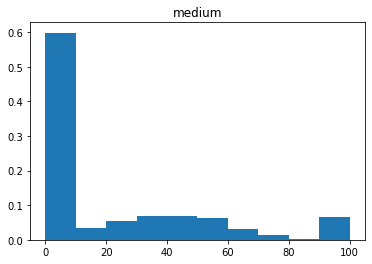

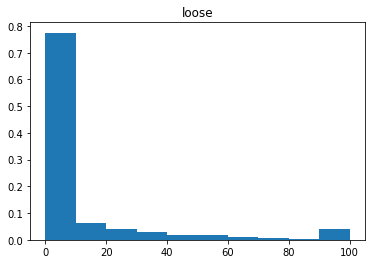

group 11


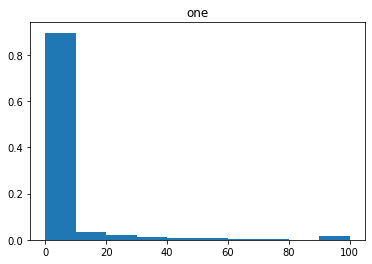

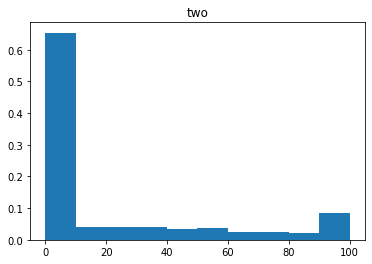

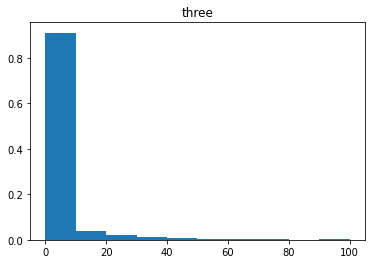

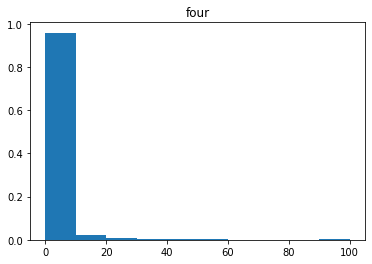

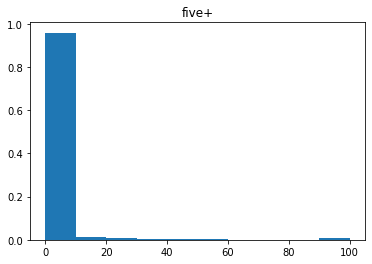

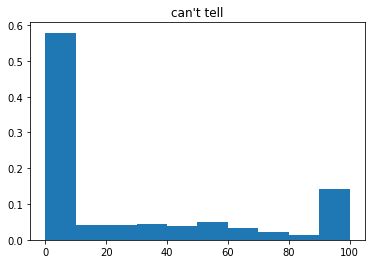

In [ ]:
for group, idx in class_groups.items():
    print(f"group {group}")
    for ix in idx:
        h, x = np.histogram(labels_renorm[:,ix], bins=10, range=(0., 1.))
        x = (x[:-1]+x[1:])/2
        plt.bar(100*x, h/sum(h), width=10)
        plt.title(label_info[ix][0])
        plt.show()

except for the top layer, where many values are uncertain, most other layers show a dichotomy of relatively clear 0/1 labels. It is hence reasonable to consider these labels only when they are certain, i. e. <0.1 or >0.9

group 0
group 1


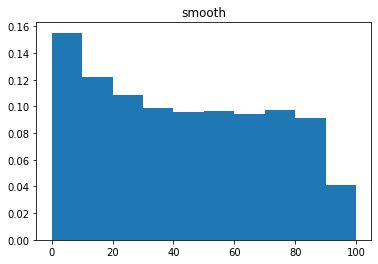

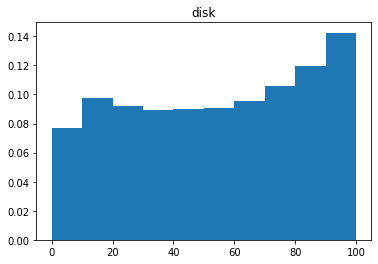

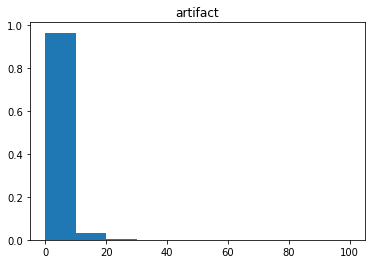

group 2


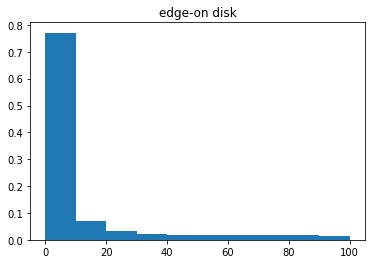

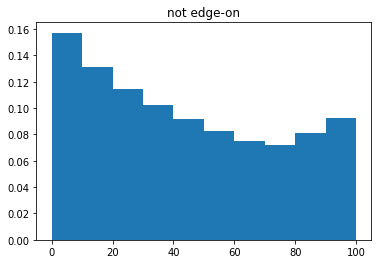

group 3


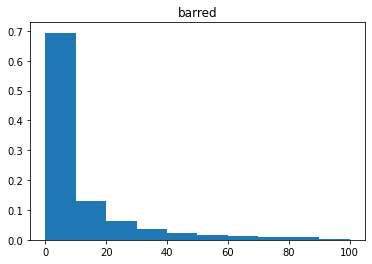

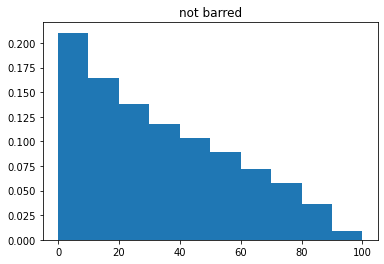

group 4


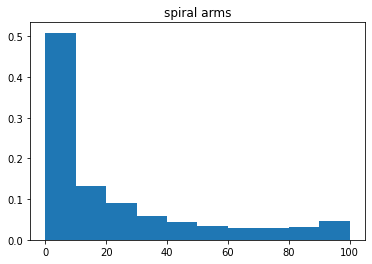

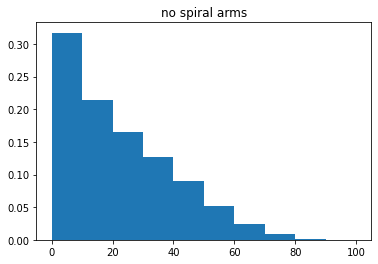

group 5


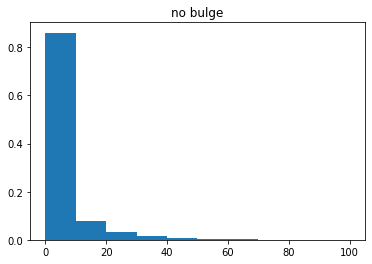

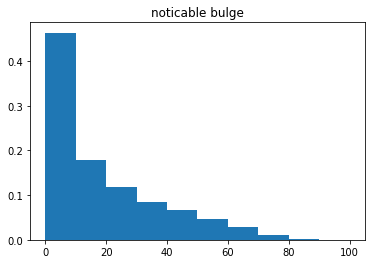

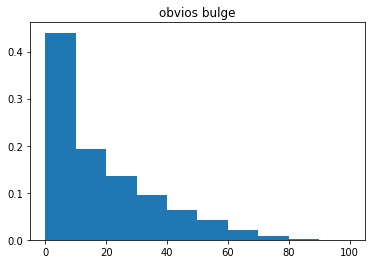

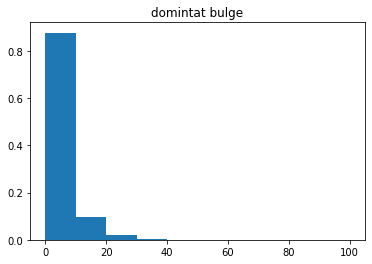

group 6


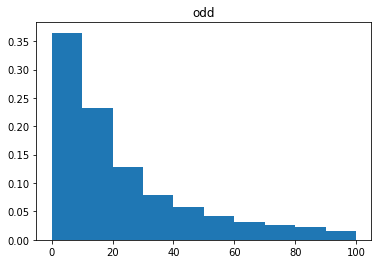

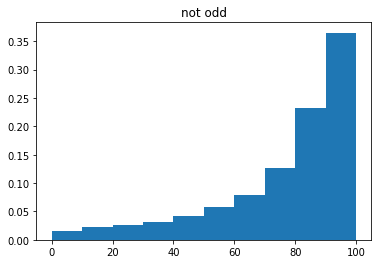

group 7


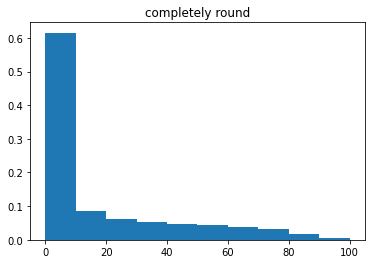

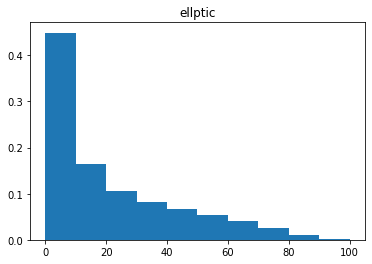

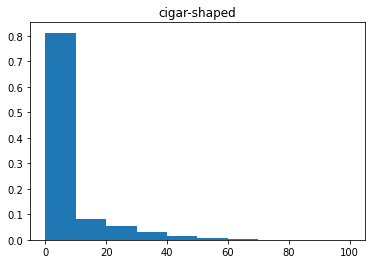

group 8


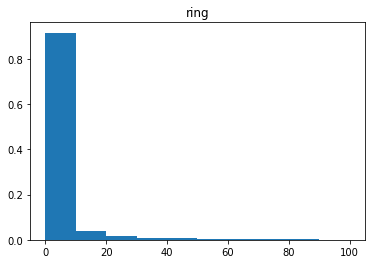

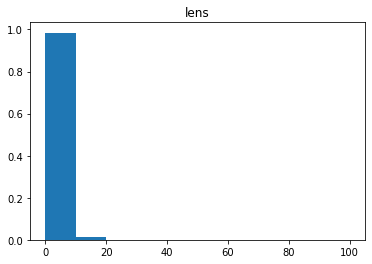

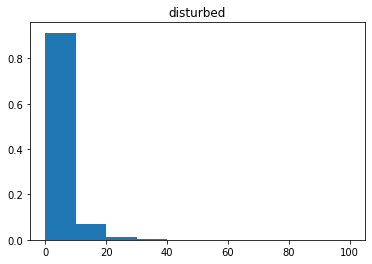

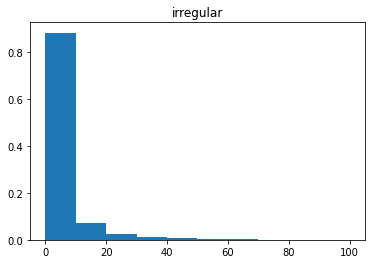

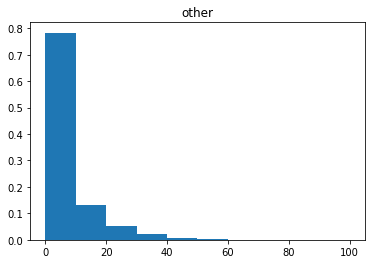

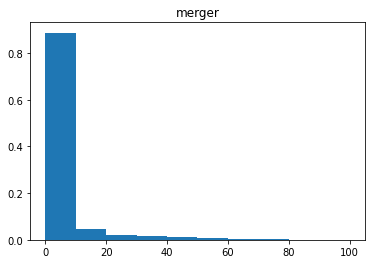

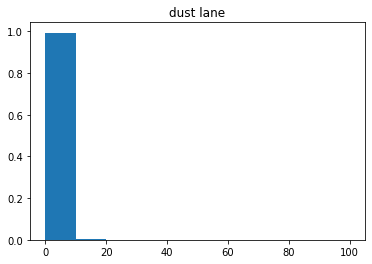

group 9


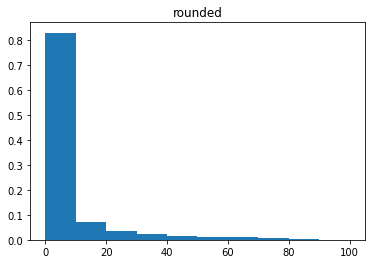

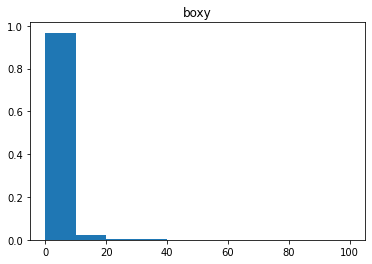

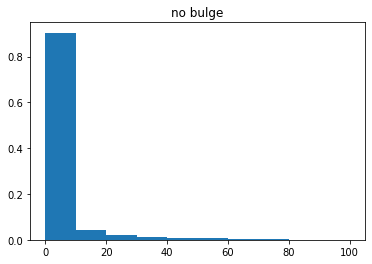

group 10


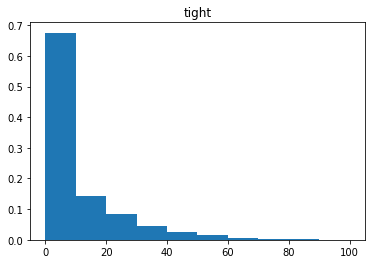

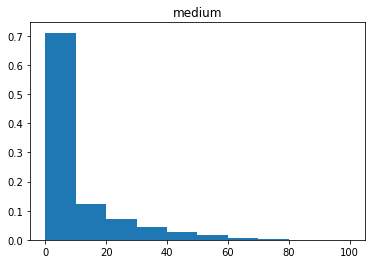

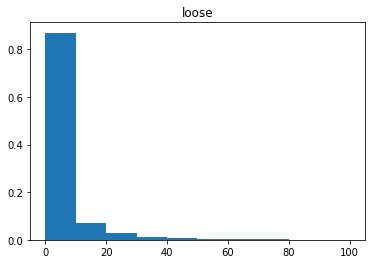

group 11


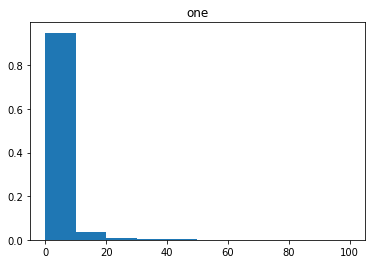

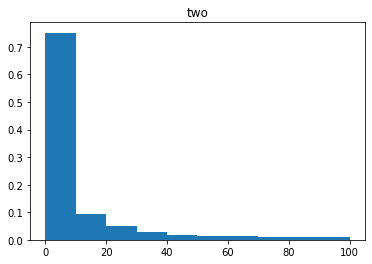

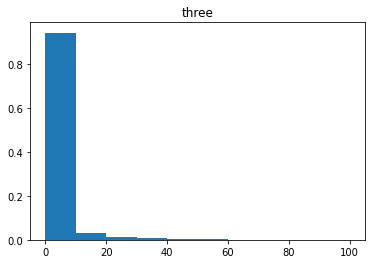

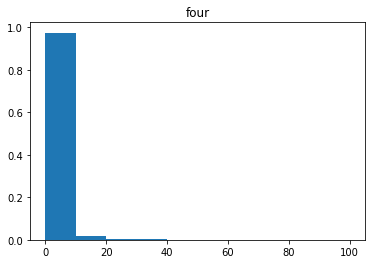

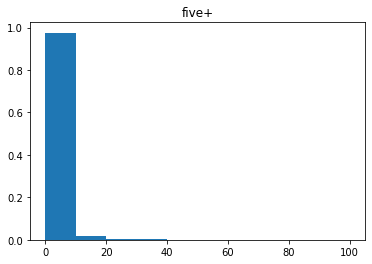

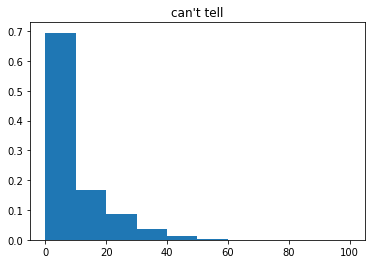

In [5]:
for group, idx in class_groups.items():
    print(f"group {group}")
    for ix in idx:
        h, x = np.histogram(labels[:,ix], bins=10, range=(0., 1.))
        x = (x[:-1]+x[1:])/2
        plt.bar(100*x, h/sum(h), width=10)
        plt.title(label_info[ix][0])
        plt.show()